In [2]:
import numpy as np
import matplotlib.pyplot as plt

from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mK as mK
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2 as mf2


from TO_sim.gen_Distribution import Quantile_Normal as Q_Normal
from TO_sim.gen_Distribution import Quantile_Lorentzian as Q_Lorentzian

from TO_sim.get_cluster import cluster_os_new2
from TO_sim.get_sec_r import get_r_Fun,get_rp,get_rp2
from scipy import interpolate

In [26]:
seed =11
N = 1000
theta_random,omega,Kc = Q_Normal(N,0,1,seed=seed)
# theta_random,omega,Kc = Q_Lorentzian(N,0,1,seed=seed)

omega = omega - np.mean(omega)
omega = np.sort(omega)
m = 7
dt = 0.1
t = np.arange(0,10000,dt)
# K = 5.3
K = 6
to_ppi = lambda y: (y + np.pi)%(2*np.pi) - np.pi
theta, dtheta,rs = mf2(K,N=N,m=m,t_array=t,p_theta=theta_random,p_dtheta=0*omega,p_omega=omega)

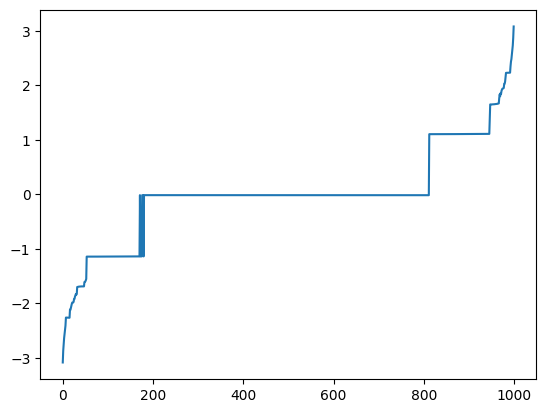

In [27]:
v_t = np.mean(dtheta[-500:],axis=0)
plt.plot(v_t)

In [28]:
con0 = np.abs(v_t) < 0.1 
c_0, = np.where(con0)
c_p, = np.where(np.logical_and(~con0, omega > 0))
c_m, = np.where(np.logical_and(~con0, omega < 0))

In [29]:
a_dtheta = []
for i in range(0,len(t)-1000,10):
    d = (theta[i+1000] - theta[i])/(t[i+1000] - t[i])
    a_dtheta.append(d)
a_dtheta = np.array(a_dtheta)

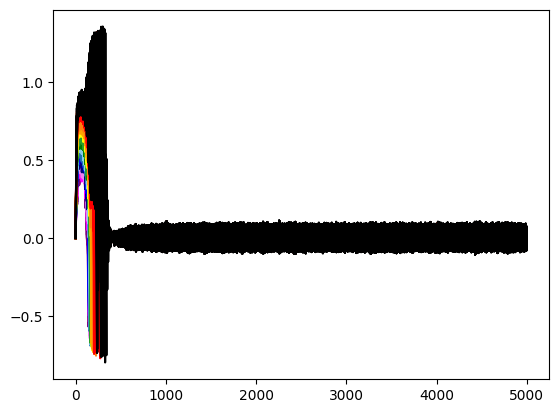

In [74]:
plt.plot(t,dtheta[:,c_0[-140:-130]],color='purple')
plt.plot(t,dtheta[:,c_0[-130:-120]],color='magenta')
plt.plot(t,dtheta[:,c_0[-120:-110]],color='violet')
plt.plot(t,dtheta[:,c_0[-110:-100]],color='navy')
plt.plot(t,dtheta[:,c_0[-100:-90]],color='blue')
plt.plot(t,dtheta[:,c_0[-90:-80]],color='tab:blue')
plt.plot(t,dtheta[:,c_0[-80:-70]],color='skyblue')
plt.plot(t,dtheta[:,c_0[-70:-60]],color='green')
plt.plot(t,dtheta[:,c_0[-60:-50]],color='tab:green')
plt.plot(t,dtheta[:,c_0[-50:-40]],color='yellow')
plt.plot(t,dtheta[:,c_0[-40:-30]],color='orange')
plt.plot(t,dtheta[:,c_0[-30:-20]],color='tab:orange')
plt.plot(t,dtheta[:,c_0[-20:-10]],color='red')
plt.plot(t,dtheta[:,c_0[-10:]],color='black')
# plt.xlim(600,610)
# plt.ylim(0.5,1.1)

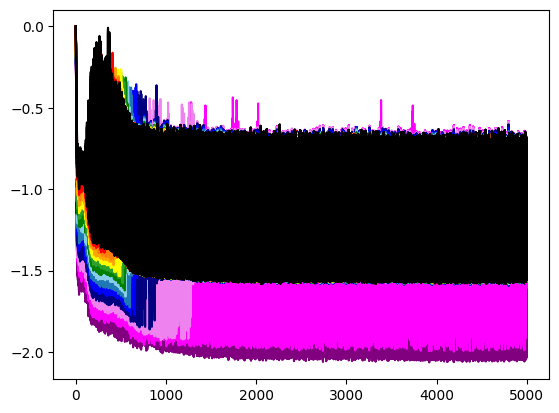

In [73]:
plt.plot(t,dtheta[:,c_m[-140:-130]],color='purple')
plt.plot(t,dtheta[:,c_m[-130:-120]],color='magenta')
plt.plot(t,dtheta[:,c_m[-120:-110]],color='violet')
plt.plot(t,dtheta[:,c_m[-110:-100]],color='navy')
plt.plot(t,dtheta[:,c_m[-100:-90]],color='blue')
plt.plot(t,dtheta[:,c_m[-90:-80]],color='tab:blue')
plt.plot(t,dtheta[:,c_m[-80:-70]],color='skyblue')
plt.plot(t,dtheta[:,c_m[-70:-60]],color='green')
plt.plot(t,dtheta[:,c_m[-60:-50]],color='tab:green')
plt.plot(t,dtheta[:,c_m[-50:-40]],color='yellow')
plt.plot(t,dtheta[:,c_m[-40:-30]],color='orange')
plt.plot(t,dtheta[:,c_m[-30:-20]],color='tab:orange')
plt.plot(t,dtheta[:,c_m[-20:-10]],color='red')

plt.plot(t,dtheta[:,c_m[-10:]],color='black')
# plt.xlim(600,610)
# plt.ylim(0.5,1.1)

(-0.5, -1.8)

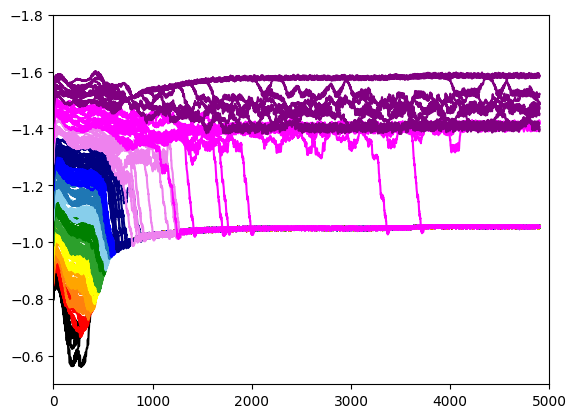

In [69]:
plt.plot(a_dtheta[:,c_m[-10:]],color='black')
plt.plot(a_dtheta[:,c_m[-20:-10]],color='red')
plt.plot(a_dtheta[:,c_m[-30:-20]],color='tab:orange')
plt.plot(a_dtheta[:,c_m[-40:-30]],color='orange')
plt.plot(a_dtheta[:,c_m[-50:-40]],color='yellow')
plt.plot(a_dtheta[:,c_m[-60:-50]],color='tab:green')
plt.plot(a_dtheta[:,c_m[-70:-60]],color='green')
plt.plot(a_dtheta[:,c_m[-80:-70]],color='skyblue')
plt.plot(a_dtheta[:,c_m[-90:-80]],color='tab:blue')
plt.plot(a_dtheta[:,c_m[-100:-90]],color='blue')
plt.plot(a_dtheta[:,c_m[-110:-100]],color='navy')
plt.plot(a_dtheta[:,c_m[-120:-110]],color='violet')
plt.plot(a_dtheta[:,c_m[-130:-120]],color='magenta')
plt.plot(a_dtheta[:,c_m[-140:-130]],color='purple')
plt.xlim(0,5000)
plt.ylim(-0.5,-1.8)

In [31]:
r0 = np.mean(np.exp(1j*theta[-5000:,c_0]),axis=1) * len(c_0)/N
rp = np.mean(np.exp(1j*theta[-5000:,c_p]),axis=1) * len(c_p)/N
rm = np.mean(np.exp(1j*theta[-5000:,c_m]),axis=1) * len(c_m)/N

In [32]:
avg_dtheta = (theta[500:] - theta[:-500])/(50)
CS,CMP,cluster,_,_,_,_,_,_ =cluster_os_new2(avg_dtheta[-20:-1],height=0.001,check=2,c_size=1,omega=omega)

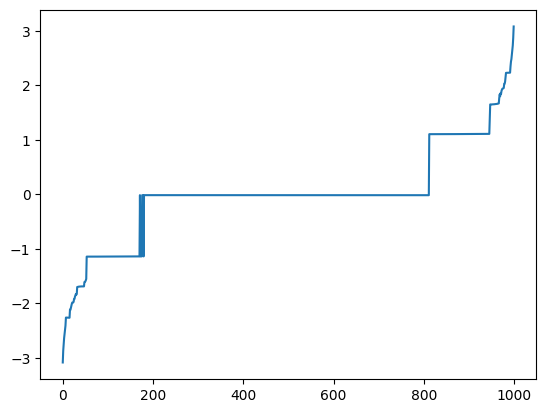

In [33]:
plt.plot(v_t)

In [34]:
r0_2 = np.mean(np.exp(1j*theta[-5000:,cluster[0]]),axis=1) * len(cluster[0])/N
rp_2 = np.mean(np.exp(1j*theta[-5000:,cluster[2]]),axis=1) * len(cluster[2])/N
rm_2 = np.mean(np.exp(1j*theta[-5000:,cluster[1]]),axis=1) * len(cluster[1])/N

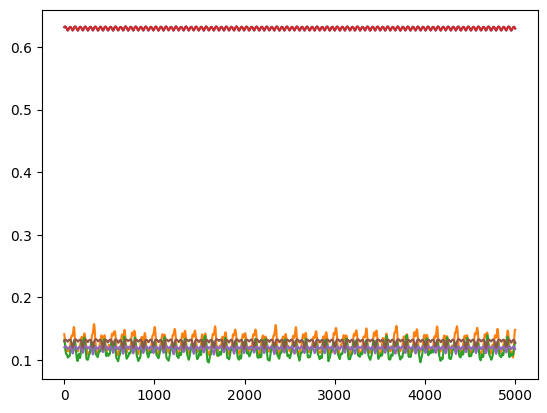

In [39]:
plt.plot(np.abs(r0))
plt.plot(np.abs(rp))
plt.plot(np.abs(rm))
plt.plot(np.abs(r0_2))
plt.plot(np.abs(rp_2))
plt.plot(np.abs(rm_2))

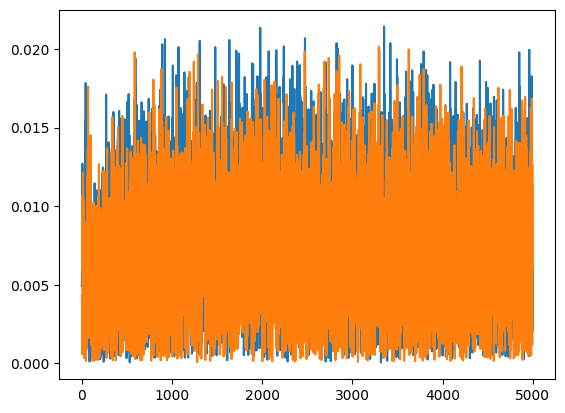

In [97]:
plt.plot(t,np.abs(rp-rm_2))
plt.plot(t,np.abs(rm-rp_2))

## ***check1***
1. $r+$의 값과 $r_{+,drift}$의 값의 차이는 거의 없다. 

만약 논문에서 수정한데로 클러스터와 나머지로 나눌경우랑, 클러스터를 확인해서 나눈 것이랑 큰 차이는 보이지 않는다
2. r_drift의 값은 매우 작은 영향이다.

## CHECK $r_+$ analytical result

In [93]:
m = 10

In [94]:
F = get_r_Fun(m)
Ks = np.arange(0,20,0.05)
R_0u = F['u']['R0'](Ks)
idx = np.isnan(R_0u)
K_urp = Ks[~idx]
R_0u = R_0u[~idx]
OPS = F['u']['OPS'](K_urp)
Ks,rp_d,rp_u,rp0_d,rp0_u = get_rp(K_urp,R_0u,OPS,m,MAX=False)
# KsM,rpM_d,rpM_u,rpM0_d,rpM0_u = get_rp(K_urp,R_0u,OPS,m,MAX=True)

In [95]:
Ks,rp2_d,rp2_u,rp20_d,rp20_u = get_rp2(K_urp,R_0u,OPS,m,MAX=False)

In [96]:
F_rp = interpolate.interp1d(Ks,rp_u,bounds_error=False)
F_rp2 = interpolate.interp1d(Ks,rp2_u,bounds_error=False)

In [97]:
F_rp(K),F_rp2(K),np.abs(np.mean(np.abs(rp[-100:]))),np.abs(np.mean(np.abs(rm[-100:])))

(array(0.18895354), array(0.19059029), 0.1250877850602806, 0.11672461298890982)

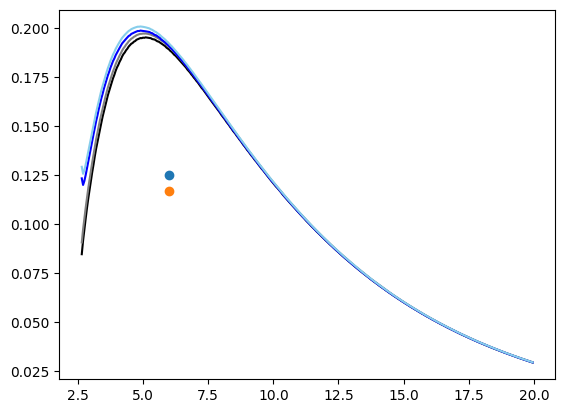

In [98]:
plt.plot(Ks,rp_u,color='black')
plt.plot(Ks,rp0_u,color='gray')

plt.plot(Ks,rp2_u,color='blue')
plt.plot(Ks,rp20_u,color='skyblue')
plt.scatter(K,np.abs(np.mean(np.abs(rp[-100:]))))
plt.scatter(K,np.abs(np.mean(np.abs(rm[-100:]))))

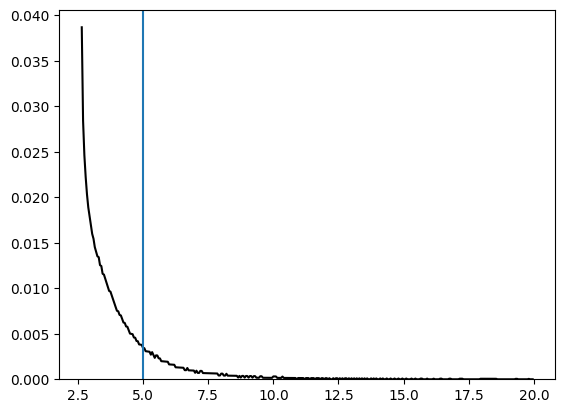

In [103]:
plt.plot(Ks,rp2_u-rp_u,color='black')
# plt.yscale('log')
# plt.xscale('log')
plt.ylim(0,)
plt.axvline(5)
# plt.plot(Ks,,color='blue')
